# Mini Project 1- Stock Market Analysis Using Python



#

## For AMAZON Stock :-

### # Task 1 : *Read the Data from Yahoo finance website directly.*

In [1]:
# import yfinance as yf
# amazoninfo = yf.Ticker("AMZN")             # Here We are getting Amazon stock information
# amazon_data = amazoninfo.history("2y")     # Fetching historical data from using yfinance
# amazon_data.head()                         # Display the first few rows of the data

In [2]:
from datetime import datetime                          # Importing the library
end = datetime.now()                                   # Current date and time
start_date = datetime(end.year-2,end.month,end.day-1)  # 2-years
end_date = datetime(end.year,end.month,end.day-1)      # Todays date

In [3]:
import yfinance as yf

AMZN = yf.download('AMZN', start_date, end_date)    # Here We are getting Amazon stock information

C:\Users\HP\anaconda3\Lib\site-packages\yfinance\base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()
[*********************100%%**********************]  1 of 1 completed


In [4]:
# Converting into DataFrame.

import pandas as pd

amazon_data = pd.DataFrame(AMZN)
amazon_data.head()                           # Display the first few rows of the data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-04-18,151.523499,154.039505,150.250504,152.785004,152.785004,46514000
2022-04-19,152.029495,158.649002,151.550507,158.115494,158.115494,54926000
2022-04-20,157.602493,157.602493,153.603500,153.998001,153.998001,59630000
2022-04-21,154.714005,156.738007,147.589493,148.296005,148.296005,63970000
2022-04-22,148.250000,149.615005,143.697495,144.350006,144.350006,73078000


In [5]:
# Creating copy of original data.

amazon_data_1 = amazon_data.copy()

###  # Task 2 : *Perform cleaning.*

In [6]:
# Explore the information of the data.

print(amazon_data_1.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 502 entries, 2022-04-18 to 2024-04-16
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       502 non-null    float64
 1   High       502 non-null    float64
 2   Low        502 non-null    float64
 3   Close      502 non-null    float64
 4   Adj Close  502 non-null    float64
 5   Volume     502 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 27.5 KB
None


In [7]:
# Check for missing values.

print(amazon_data_1.isnull().sum())

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [8]:
# Check for duplicate rows.

print(amazon_data_1.duplicated().sum())

0


In [9]:
# Explore the data.

print(amazon_data_1.describe())

             Open        High         Low       Close   Adj Close  \
count  502.000000  502.000000  502.000000  502.000000  502.000000   
mean   125.897083  127.648719  124.158322  125.953055  125.953055   
std     25.249415   25.238546   25.319473   25.299238   25.299238   
min     82.800003   83.480003   81.430000   81.820000   81.820000   
25%    104.190002  106.134998  102.519997  104.470003  104.470003   
50%    125.279999  127.365002  124.000000  125.854248  125.854248   
75%    141.255005  143.377502  139.819996  142.095005  142.095005   
max    187.720001  189.770004  185.509995  189.050003  189.050003   

             Volume  
count  5.020000e+02  
mean   6.283572e+07  
std    2.779960e+07  
min    2.237840e+07  
25%    4.540690e+07  
50%    5.590180e+07  
75%    7.131908e+07  
max    2.726620e+08  


### # task 3 : *What was the change in stock price over time?*

In [10]:
# Creating a mew column named 'Price_Change'.

amazon_data_1['Price_Change'] = amazon_data_1['Close'].diff()  #Calculates the difference
amazon_data_1.fillna(0, inplace = True )                       #Replace NaN by '0'
print('The Change in Stock Price Over Time : \n')
amazon_data_1[['Price_Change']]

The Change in Stock Price Over Time : 



,Price_Change
Date,
2022-04-18,0.000000
2022-04-19,5.330490
2022-04-20,-4.117493
2022-04-21,-5.701996
2022-04-22,-3.945999
...,...
2024-04-10,0.279999
2024-04-11,3.100006
2024-04-12,-2.919998


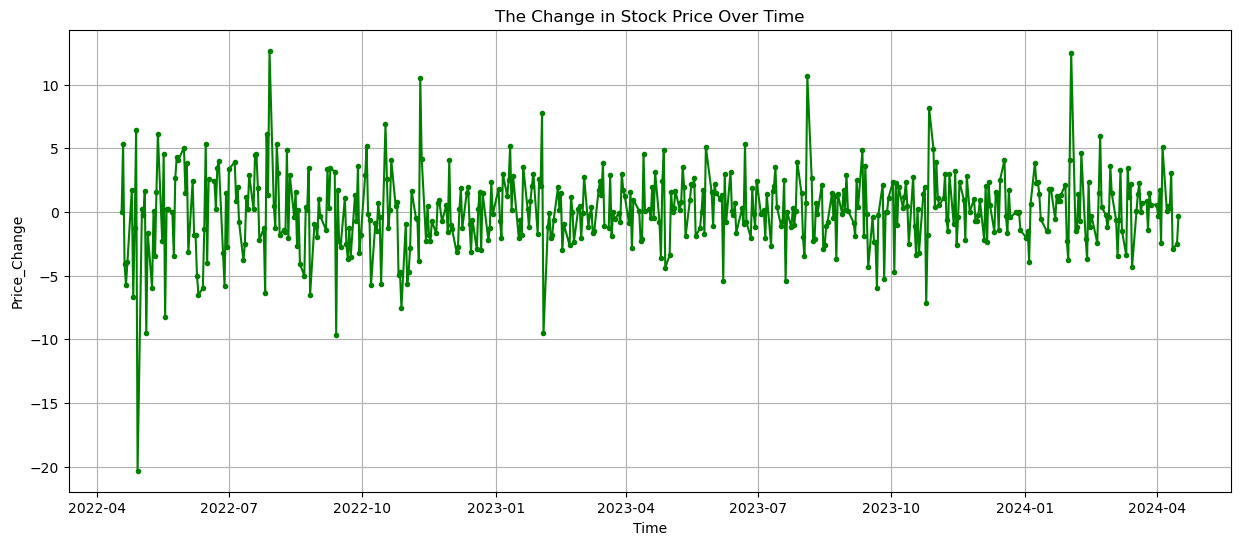

In [11]:
# Visualize Change in Amazon Stock's Price Over Time

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.plot(amazon_data_1.index, amazon_data_1['Price_Change'], color = 'green', marker = '.')
plt.title('The Change in Stock Price Over Time')
plt.xlabel('Time')
plt.ylabel('Price_Change')
plt.grid()
plt.show()

### # Task 4 : *Visualize the change in a stock’s volume being traded, over time?*

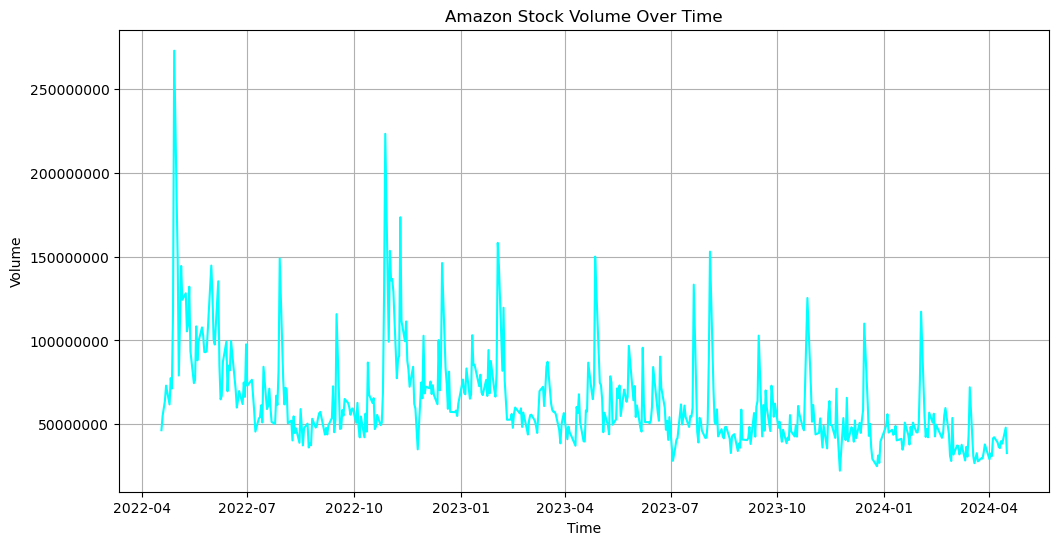

In [12]:
# Visualize Change in Amazon Stock's Volume Over Time.

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(12, 6))
sns.lineplot(x = amazon_data_1.index, y = amazon_data_1['Volume'], color = 'cyan')

plt.title('Amazon Stock Volume Over Time')
plt.xlabel('Time')
plt.ylabel('Volume')
plt.ticklabel_format(style='plain', axis='y')
plt.grid()
plt.show()

### # Task 5 : *What was the moving average of various stocks?*

In [13]:
# Two different types of Moving Average : 
# 1). Simple Moving Average (SMA)
# 2). Exponential Moving Average (EMA)

In [14]:
# Calculating Simple Moving Average (SMA) of 50 days and 200 days

amazon_data_1['SMA_50'] = amazon_data_1['Close'].rolling(window=50).mean()
 # Here rolling() provide rolling window calculations of 50 rows and then calculating the mean.

amazon_data_1['SMA_200'] = amazon_data_1['Close'].rolling(window=200).mean()

amazon_data_1[['SMA_50','SMA_200']]

,SMA_50,SMA_200
Date,,
2022-04-18,NaN,NaN
2022-04-19,NaN,NaN
2022-04-20,NaN,NaN
2022-04-21,NaN,NaN
2022-04-22,NaN,NaN
...,...,...
2024-04-10,174.733399,147.82565
2024-04-11,175.334399,148.13425
2024-04-12,175.953000,148.41900


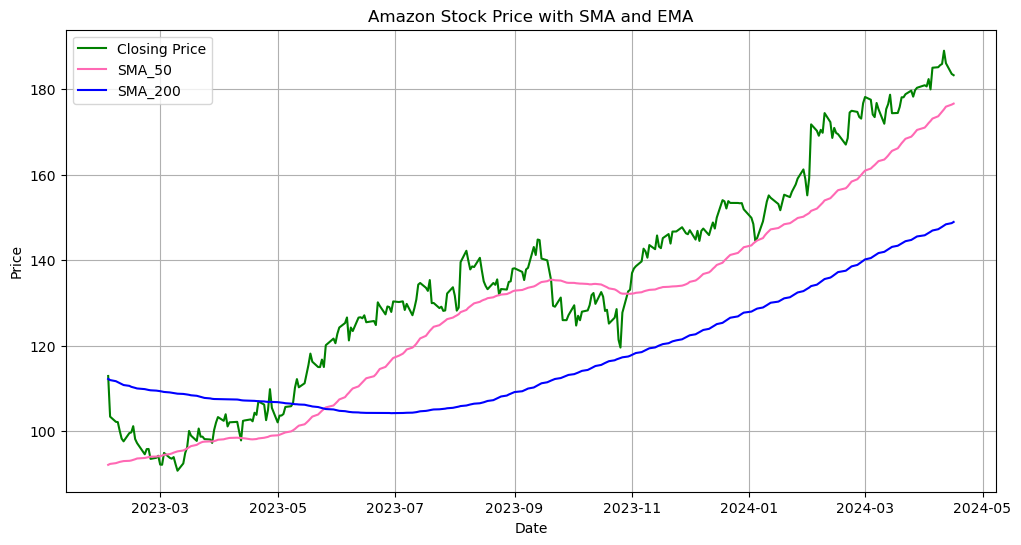

In [15]:
# Plotting the stock prices, SMA_50, and SMA_200

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

sns.lineplot(amazon_data_1['Close'].iloc[200:], label='Closing Price', color = 'green')
   # Here we are taking rows from 200, to neglating the SMA_200's first 200 rows.
    
sns.lineplot(amazon_data_1['SMA_50'].iloc[200:], label='SMA_50', color='hotpink')
sns.lineplot(amazon_data_1['SMA_200'].iloc[200:], label='SMA_200', color='blue')

# Add labels, title and legend
plt.title('Amazon Stock Price with SMA and EMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()

# Showing the plot
plt.show()

### # Task 6 : *What was the daily return average of a stock?*

In [16]:
# Calculating the Daily Return 

amazon_data_1['Daily Return (in %)'] = amazon_data_1['Close'].pct_change()*100
# pct_change() computes the fractional change between the current and a prior element.

amazon_data_1[['Daily Return (in %)']] 

,Daily Return (in %)
Date,
2022-04-18,NaN
2022-04-19,3.488883
2022-04-20,-2.604104
2022-04-21,-3.702643
2022-04-22,-2.660894
...,...
2024-04-10,0.150805
2024-04-11,1.667118
2024-04-12,-1.544564


In [17]:
# The daily return average of a Amazon stock

print(
      'The daily return average of a Amazon stock is : ', 
       round(amazon_data_1['Daily Return (in %)'].mean(),2),
       '%'
     )

The daily return average of a Amazon stock is :  0.07 %


### # Task 7 : *Add a new column ‘Trend’ whose values are based on the 'Daily Return'.*

In [18]:
# Add a new column 'Trend' based on 'DailyReturn'

amazon_data_1['Trend'] = 'Stable'     # Default trend is set to 'Stable'

amazon_data_1.loc[amazon_data_1['Daily Return (in %)'] > 0, 'Trend'] = 'Positive'

amazon_data_1.loc[amazon_data_1['Daily Return (in %)'] < 0, 'Trend'] = 'Negative'

In [19]:
amazon_data_1[['Daily Return (in %)', 'Trend']].head()

,Daily Return (in %),Trend
Date,,
2022-04-18,NaN,Stable
2022-04-19,3.488883,Positive
2022-04-20,-2.604104,Negative
2022-04-21,-3.702643,Negative
2022-04-22,-2.660894,Negative


### # Task 8 : *Visualize trend frequency through a Pie Chart.*

In [20]:
# Count the frequency of each Trend

counts = amazon_data_1['Trend'].value_counts()
counts

Positive    259
Negative    239
Stable        4
Name: Trend, dtype: int64

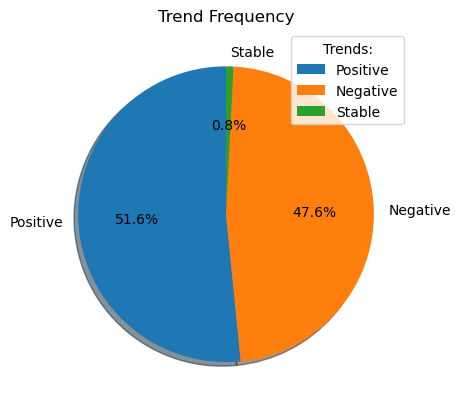

In [21]:
# Visualize through a Pie Chart.

import matplotlib.pyplot as plt

plt.pie(counts, labels = counts.index, autopct='%1.1f%%', shadow = True, startangle = 90)
plt.title('Trend Frequency')
plt.legend(title = "Trends:")
plt.show()

 # " Now move on to the Apple Stock. "

### Task 1 : *Read the Data from Yahoo finance website directly.*

In [22]:
from datetime import datetime                          # Importing the library
end = datetime.now()                                   # Current date and time
start_date = datetime(end.year-2,end.month,end.day-1)  # 2-years
end_date = datetime(end.year,end.month,end.day-1)      # Todays date

In [23]:
import yfinance as yf

AAPL = yf.download('AAPL', start_date, end_date)

[*********************100%%**********************]  1 of 1 completed


In [24]:
# Converting into DataFrame.

import pandas as pd

apple = pd.DataFrame(AAPL)
apple.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-04-18,163.919998,166.600006,163.570007,165.070007,163.204941,69023900
2022-04-19,165.020004,167.820007,163.910004,167.399994,165.508606,67723800
2022-04-20,168.759995,168.880005,166.100006,167.229996,165.340530,67929800
2022-04-21,168.910004,171.529999,165.910004,166.419998,164.539688,87227800
2022-04-22,166.460007,167.869995,161.500000,161.789993,159.962006,84882400


In [25]:
# First we creating copy of original data for further Analysis

apple_1 = apple.copy()

###  # Task 2 : *Perform cleaning.*

In [26]:
# Explore the information of the data.

print('# Information of Apple Stock : \n')
print(apple_1.info())

# Information of Apple Stock : 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 502 entries, 2022-04-18 to 2024-04-16
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       502 non-null    float64
 1   High       502 non-null    float64
 2   Low        502 non-null    float64
 3   Close      502 non-null    float64
 4   Adj Close  502 non-null    float64
 5   Volume     502 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 27.5 KB
None


In [27]:
# Check for missing values.

print('# Null Values in Apple Stocks data : ')
print(apple_1.isnull().sum(), '\n')

# Null Values in Apple Stocks data : 
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64 



In [28]:
# Check for duplicate rows.

print('No. of Duplicate Rows in Apple Stocks data : ',
      apple_1.duplicated().sum(), '\n'
    )

No. of Duplicate Rows in Apple Stocks data :  0 



### # task 3 : *What was the change in stock price over time?*

In [29]:
# Creating a mew column named 'Price_Change'.

apple_1['Price_Change'] = apple_1['Close'].diff() 
apple_1.fillna(0, inplace = True )
apple_1[['Price_Change']]

,Price_Change
Date,
2022-04-18,0.000000
2022-04-19,2.329987
2022-04-20,-0.169998
2022-04-21,-0.809998
2022-04-22,-4.630005
...,...
2024-04-10,-1.889999
2024-04-11,7.259995
2024-04-12,1.510010


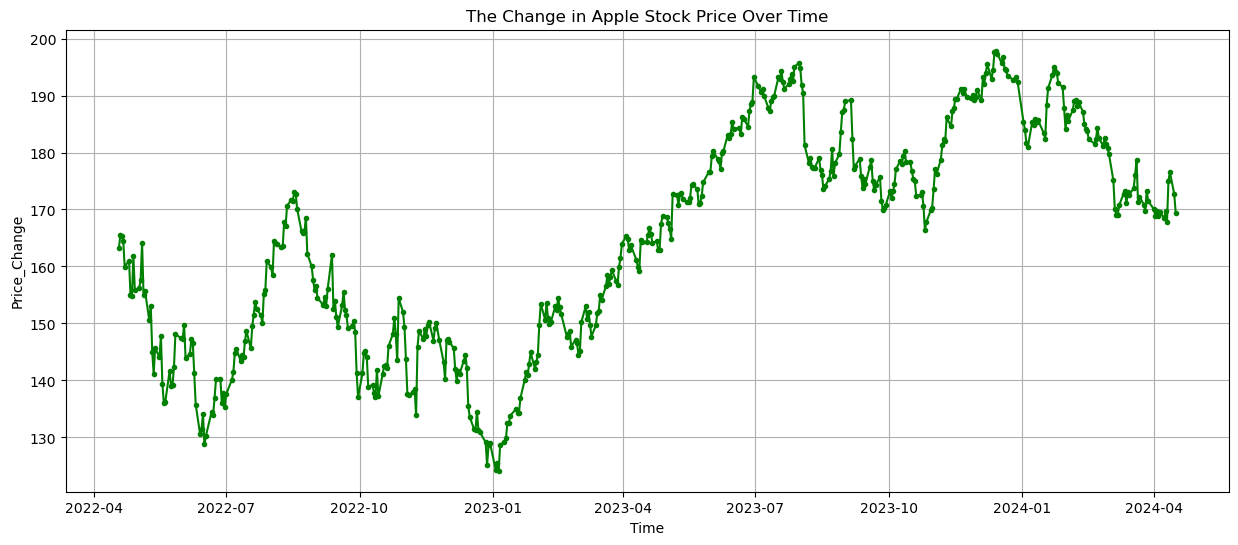

In [30]:
# Visualize Change in Different Stock Prices Over Time

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.plot(apple_1.index, apple_1['Adj Close'], color = 'green', marker = '.')

plt.title('The Change in Apple Stock Price Over Time')
plt.xlabel('Time')
plt.ylabel('Price_Change')
plt.grid()
plt.show()

### # Task 4 : *Visualize the change in a stock’s volume being traded, over time?*

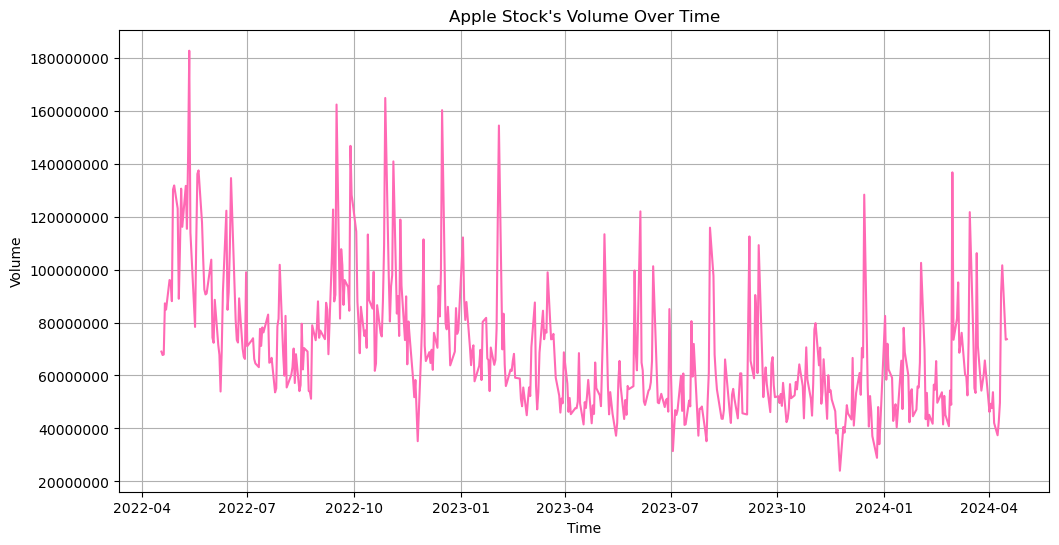

In [31]:
# Visualize Change in Stock's Volume Over Time.

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(12, 6))
sns.lineplot(x = apple_1.index, y = apple_1['Volume'], color = 'hotpink')

plt.title("Apple Stock's Volume Over Time")
plt.xlabel('Time')
plt.ylabel('Volume')
plt.ticklabel_format(style='plain', axis='y')
plt.grid()
plt.show()

### # Task 5 : *What was the moving average of Apple stock?*

In [32]:
# Calculating Simple Moving Average (SMA) of 50 days and 200 days.

apple_1['SMA_50'] = apple_1['Adj Close'].rolling(window=50).mean()
apple_1['SMA_200'] = apple_1['Adj Close'].rolling(window=200).mean()

apple_1[['SMA_50','SMA_200']]

,SMA_50,SMA_200
Date,,
2022-04-18,NaN,NaN
2022-04-19,NaN,NaN
2022-04-20,NaN,NaN
2022-04-21,NaN,NaN
2022-04-22,NaN,NaN
...,...,...
2024-04-10,177.455771,182.536994
2024-04-11,177.200564,182.489488
2024-04-12,177.048264,182.435637


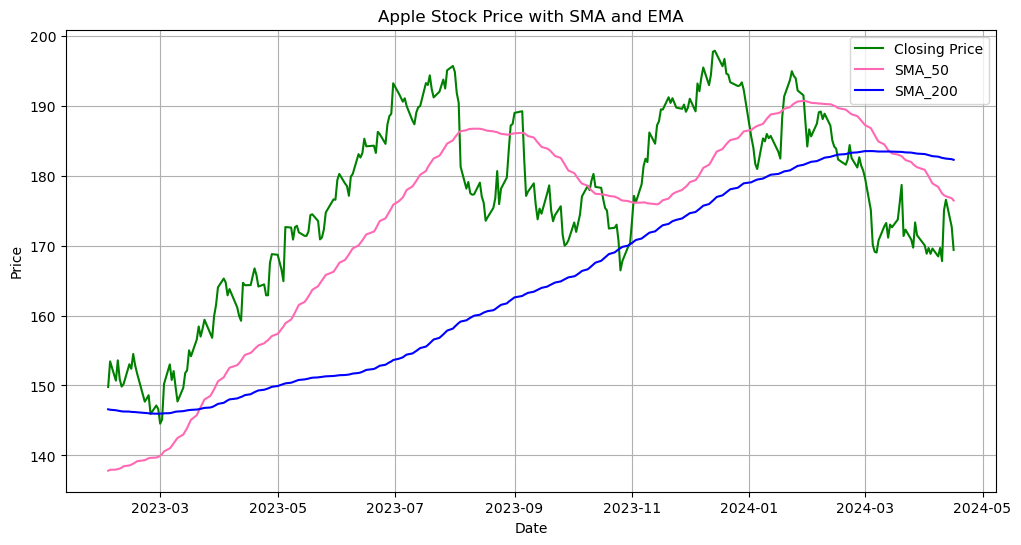

In [33]:
# Plotting the SMA_50, and SMA_200 of Apple Stock.

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.lineplot(apple_1['Adj Close'].iloc[200:], label='Closing Price', color = 'green')
sns.lineplot(apple_1['SMA_50'].iloc[200:], label='SMA_50', color='hotpink')
sns.lineplot(apple_1['SMA_200'].iloc[200:], label='SMA_200', color='blue')

plt.grid()
plt.title('Apple Stock Price with SMA and EMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

### # Task 6 : *What was the daily return average of a stock?*

In [34]:
# Calculating the Daily Return

apple_1['Daily Return (in %)'] = apple_1['Adj Close'].pct_change()*100
apple_1[['Daily Return (in %)']]

,Daily Return (in %)
Date,
2022-04-18,NaN
2022-04-19,1.411517
2022-04-20,-0.101551
2022-04-21,-0.484359
2022-04-22,-2.782114
...,...
2024-04-10,-1.113927
2024-04-11,4.327092
2024-04-12,0.862666


In [35]:
# Daily return average :

print(
      'The daily return average of a APPLE stock is : ', 
       round(apple_1['Daily Return (in %)'].mean(),2),
       '%'
     )

The daily return average of a APPLE stock is :  0.02 %


### # Task 7 : *Add a new column ‘Trend’ whose values are based on the 'Daily Return'.*

In [36]:
# APPLE Stock's Trend :

apple_1['Trend'] = 'Stable'     

apple_1.loc[apple_1['Daily Return (in %)'] > 0, 'Trend'] = 'Positive'

apple_1.loc[apple_1['Daily Return (in %)'] < 0, 'Trend'] = 'Negative'

print('\nAPPLE Stock Trend :')
apple_1[['Daily Return (in %)', 'Trend']].head()


APPLE Stock Trend :


,Daily Return (in %),Trend
Date,,
2022-04-18,NaN,Stable
2022-04-19,1.411517,Positive
2022-04-20,-0.101551,Negative
2022-04-21,-0.484359,Negative
2022-04-22,-2.782114,Negative


### # Task 8 : *Visualize trend frequency through a Pie Chart.*

In [37]:
# Count the frequency of Apple stock's Trend frequency.

apple_counts = apple_1['Trend'].value_counts()
print('\nAPPLE counts : \n', apple_counts)


APPLE counts : 
 Positive    254
Negative    245
Stable        3
Name: Trend, dtype: int64


Text(0.5, 1.0, 'APPLE')

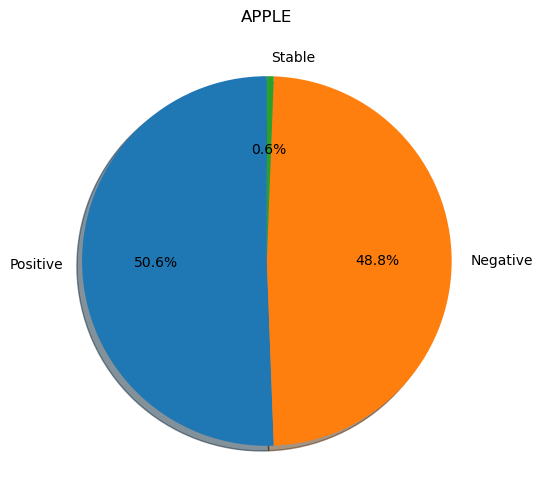

In [38]:
# Visualize through a Pie Chart.

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.pie(apple_counts, labels = apple_counts.index, autopct='%1.1f%%', shadow = True, startangle = 90)
plt.title('APPLE')

 # " Analysis for Google Stock. "

### Task 1 : *Read the Data from Yahoo finance website directly.*

In [39]:
import yfinance as yf

GOOGL = yf.download('GOOGL', start_date, end_date)

[*********************100%%**********************]  1 of 1 completed


In [40]:
# Converting into DataFrame.

import pandas as pd

google = pd.DataFrame(GOOGL)
google.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-04-18,127.000000,128.212494,126.181999,127.676498,127.676498,20808000
2022-04-19,127.691498,130.332993,126.999496,130.009003,130.009003,26490000
2022-04-20,130.891998,131.399002,127.500000,128.039993,128.039993,31696000
2022-04-21,129.250000,130.098495,124.526497,124.814499,124.814499,36446000
2022-04-22,125.000000,125.402000,118.925003,119.635498,119.635498,56884000


In [41]:
# First we creating copy of original data for further Analysis

google_1 = google.copy()

### Task 2 : *Perform cleaning.*

In [42]:
# Explore the information of the data.

print('# Information of Google Stock : \n')
print(google_1.info())

# Information of Google Stock : 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 502 entries, 2022-04-18 to 2024-04-16
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       502 non-null    float64
 1   High       502 non-null    float64
 2   Low        502 non-null    float64
 3   Close      502 non-null    float64
 4   Adj Close  502 non-null    float64
 5   Volume     502 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 27.5 KB
None


In [43]:
# Check for missing values.

print('# Null Values in Google Stocks data : ')
print(google_1.isnull().sum(), '\n')

# Null Values in Google Stocks data : 
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64 



In [44]:
# Check for duplicate rows.

print('No. of Duplicate Rows in Google Stocks data : ',
      google_1.duplicated().sum(), '\n'
    )

No. of Duplicate Rows in Google Stocks data :  0 



### # task 3 : *What was the change in stock price over time?*

In [45]:
# Creating a mew column named 'Price_Change'.

google_1['Price_Change'] = google_1['Close'].diff() 
google_1.fillna(0, inplace = True )
google_1[['Price_Change']]

,Price_Change
Date,
2022-04-18,0.000000
2022-04-19,2.332504
2022-04-20,-1.969009
2022-04-21,-3.225494
2022-04-22,-5.179001
...,...
2024-04-10,-0.460007
2024-04-11,3.270004
2024-04-12,-1.680008


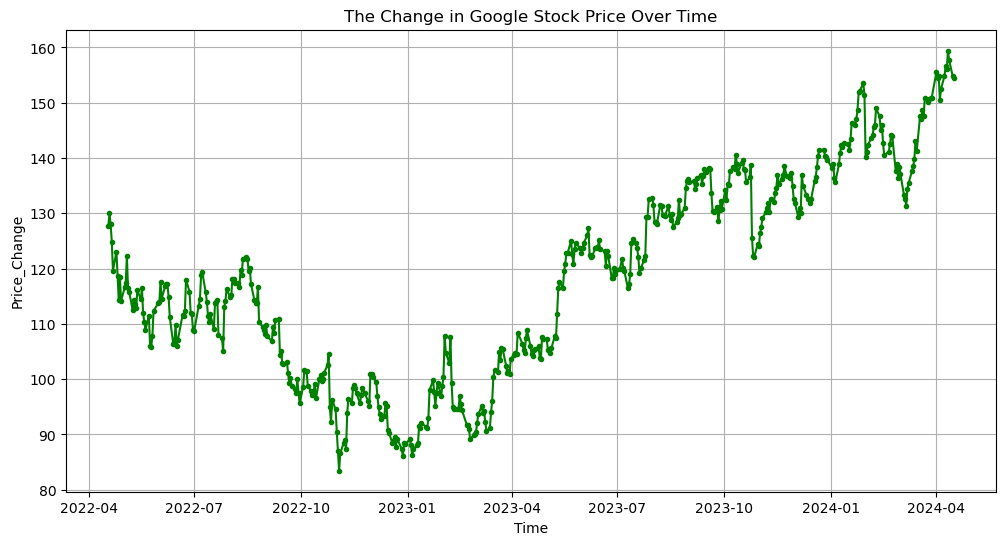

In [46]:
# Visualize Change in Google Stock Prices Over Time

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(google_1.index, google_1['Adj Close'], color = 'green', marker = '.')
plt.title('The Change in Google Stock Price Over Time')
plt.xlabel('Time')
plt.ylabel('Price_Change')
plt.grid()
plt.show()

### # Task 4 : *Visualize the change in a stock’s volume being traded, over time?*

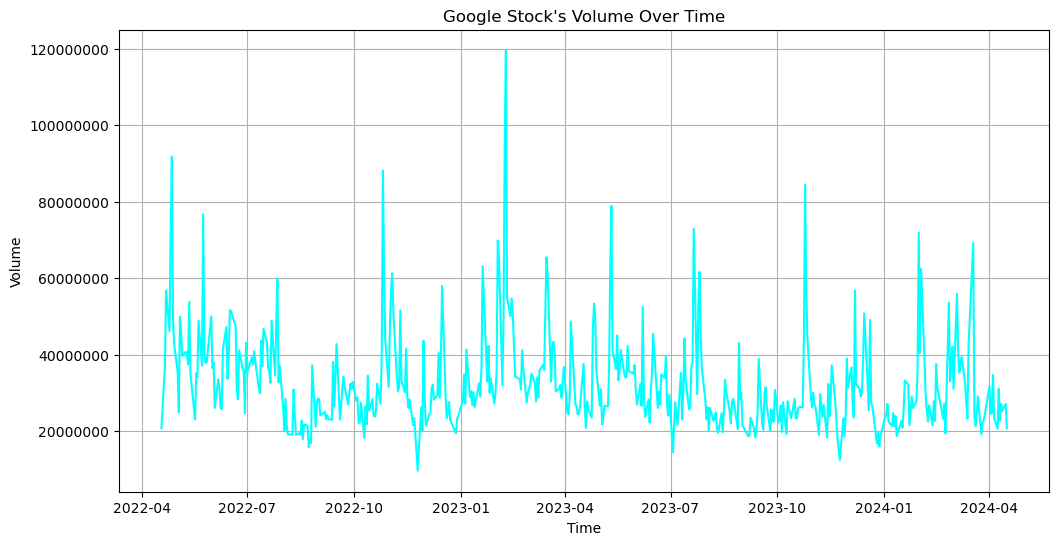

In [47]:
# Visualize Change in Stock's Volume Over Time.

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(12, 6))
sns.lineplot(x = google_1.index, y = google_1['Volume'], color = 'cyan')
plt.title("Google Stock's Volume Over Time")
plt.xlabel('Time')
plt.ylabel('Volume')
plt.ticklabel_format(style='plain', axis='y')
plt.grid()
plt.show()

### # Task 5 : *What was the moving average of Google stock?*

In [48]:
# Calculating Simple Moving Average (SMA) of 50 days and 200 days.

google_1['SMA_50'] = google_1['Adj Close'].rolling(window=50).mean()
google_1['SMA_200'] = google_1['Adj Close'].rolling(window=200).mean()

apple_1[['SMA_50','SMA_200']]

,SMA_50,SMA_200
Date,,
2022-04-18,NaN,NaN
2022-04-19,NaN,NaN
2022-04-20,NaN,NaN
2022-04-21,NaN,NaN
2022-04-22,NaN,NaN
...,...,...
2024-04-10,177.455771,182.536994
2024-04-11,177.200564,182.489488
2024-04-12,177.048264,182.435637


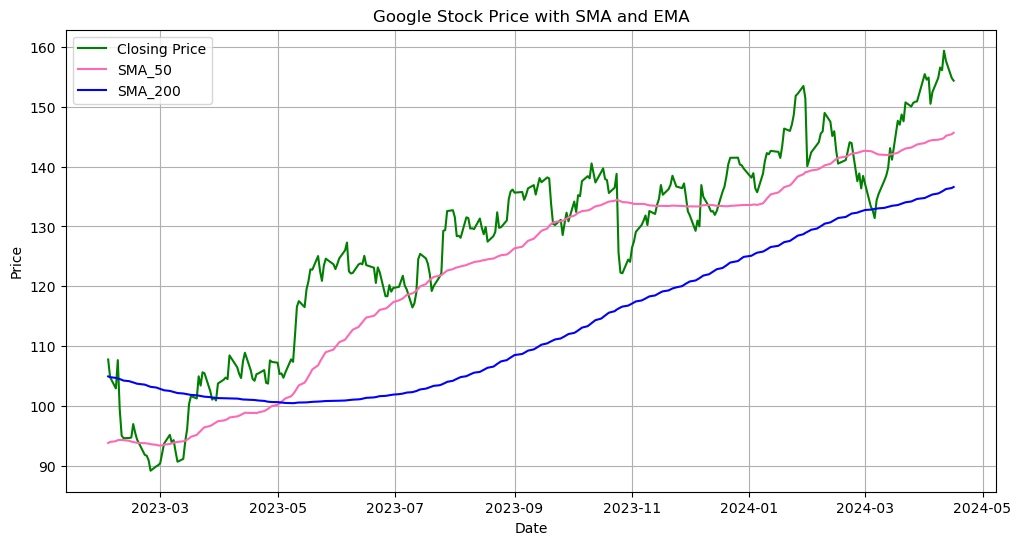

In [49]:
# Plotting the SMA_50, and SMA_200 of Google Stock.

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.lineplot(google_1['Adj Close'].iloc[200:], label='Closing Price', color = 'green')
sns.lineplot(google_1['SMA_50'].iloc[200:], label='SMA_50', color='hotpink')
sns.lineplot(google_1['SMA_200'].iloc[200:], label='SMA_200', color='blue')
plt.grid()
plt.title('Google Stock Price with SMA and EMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

### # Task 6 : *What was the daily return average of a stock?*

In [50]:
# Calculating the Daily Return

google_1['Daily Return (in %)'] = google_1['Adj Close'].pct_change()*100
google_1[['Daily Return (in %)']]

,Daily Return (in %)
Date,
2022-04-18,NaN
2022-04-19,1.826886
2022-04-20,-1.514518
2022-04-21,-2.519130
2022-04-22,-4.149358
...,...
2024-04-10,-0.293746
2024-04-11,2.094277
2024-04-12,-1.053891


In [51]:
# Daily return average

print(
      'The daily return average of a Google stock is : ', 
       round(google_1['Daily Return (in %)'].mean(),2),
       '%'
     )

The daily return average of a Google stock is :  0.06 %


### # Task 7 : *Add a new column ‘Trend’ whose values are based on the 'Daily Return'.*

In [52]:
# APPLE Stock's Trend :

google_1['Trend'] = 'Stable'     

google_1.loc[google_1['Daily Return (in %)'] > 0, 'Trend'] = 'Positive'

google_1.loc[google_1['Daily Return (in %)'] < 0, 'Trend'] = 'Negative'

print('\nGoogle Stock Trend :')
google_1[['Daily Return (in %)', 'Trend']].head()


Google Stock Trend :


,Daily Return (in %),Trend
Date,,
2022-04-18,NaN,Stable
2022-04-19,1.826886,Positive
2022-04-20,-1.514518,Negative
2022-04-21,-2.519130,Negative
2022-04-22,-4.149358,Negative


### # Task 8 : *Visualize trend frequency through a Pie Chart.*

In [53]:
# Count the frequency of Google stock's Trend frequency.

google_counts = google_1['Trend'].value_counts()
print('\nGoogle counts : \n', google_counts)


Google counts : 
 Positive    257
Negative    243
Stable        2
Name: Trend, dtype: int64


Text(0.5, 1.0, 'GOOGLE')

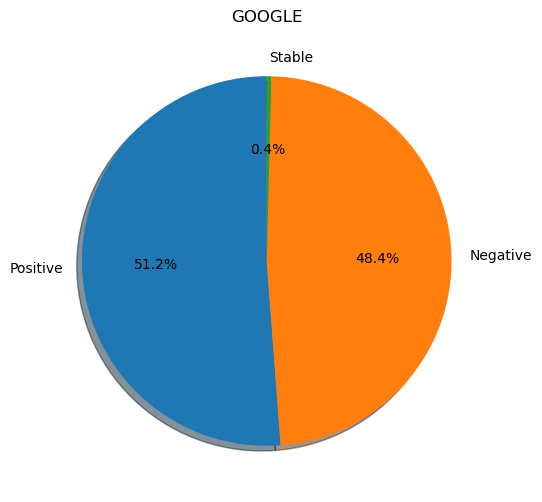

In [54]:
# Visualize through a Pie Chart.

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.pie(google_counts, labels = google_counts.index, autopct='%1.1f%%', shadow = True, startangle = 90)
plt.title('GOOGLE')

 # " Analysis for Microsoft Stock. "

### Task 1 : *Read the Data from Yahoo finance website directly.*

In [55]:
import yfinance as yf

MSFT = yf.download('MSFT', start_date, end_date)

[*********************100%%**********************]  1 of 1 completed


In [56]:
# Converting into DataFrame.

import pandas as pd

microsoft = pd.DataFrame(MSFT)
microsoft.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-04-18,278.910004,282.459991,278.339996,280.519989,275.533325,20778000
2022-04-19,279.380005,286.170013,278.410004,285.299988,280.228333,22297700
2022-04-20,289.399994,289.700012,285.369995,286.359985,281.269531,22906700
2022-04-21,288.579987,293.299988,280.059998,280.809998,275.818176,29454600
2022-04-22,281.679993,283.200012,273.380005,274.029999,269.158722,29405800


In [57]:
# First we creating copy of original data for further Analysis

microsoft_1 = microsoft.copy()

### Task 2 : *Perform cleaning.*

In [58]:
# Explore the information of the data.

print('* Information of Microsoft Stock : \n')
print(microsoft_1.info())

* Information of Microsoft Stock : 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 502 entries, 2022-04-18 to 2024-04-16
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       502 non-null    float64
 1   High       502 non-null    float64
 2   Low        502 non-null    float64
 3   Close      502 non-null    float64
 4   Adj Close  502 non-null    float64
 5   Volume     502 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 27.5 KB
None


In [59]:
# Check for missing values.

print('* Missing Values in Microsoft Stocks data : ')
print(microsoft_1.isnull().sum(), '\n')

* Missing Values in Microsoft Stocks data : 
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64 



In [60]:
# Check for duplicate rows.

print('No. of Duplicate Rows in Microsoft Stocks data : ',
      microsoft_1.duplicated().sum(), '\n'
    )

No. of Duplicate Rows in Microsoft Stocks data :  0 



### # task 3 : *What was the change in stock price over time?*

In [61]:
# Creating a mew column named 'Price_Change'.

microsoft_1['Price_Change'] = microsoft_1['Close'].diff() 
microsoft_1.fillna(0, inplace = True )
microsoft_1[['Price_Change']]

,Price_Change
Date,
2022-04-18,0.000000
2022-04-19,4.779999
2022-04-20,1.059998
2022-04-21,-5.549988
2022-04-22,-6.779999
...,...
2024-04-10,-3.019989
2024-04-11,4.669983
2024-04-12,-6.029999


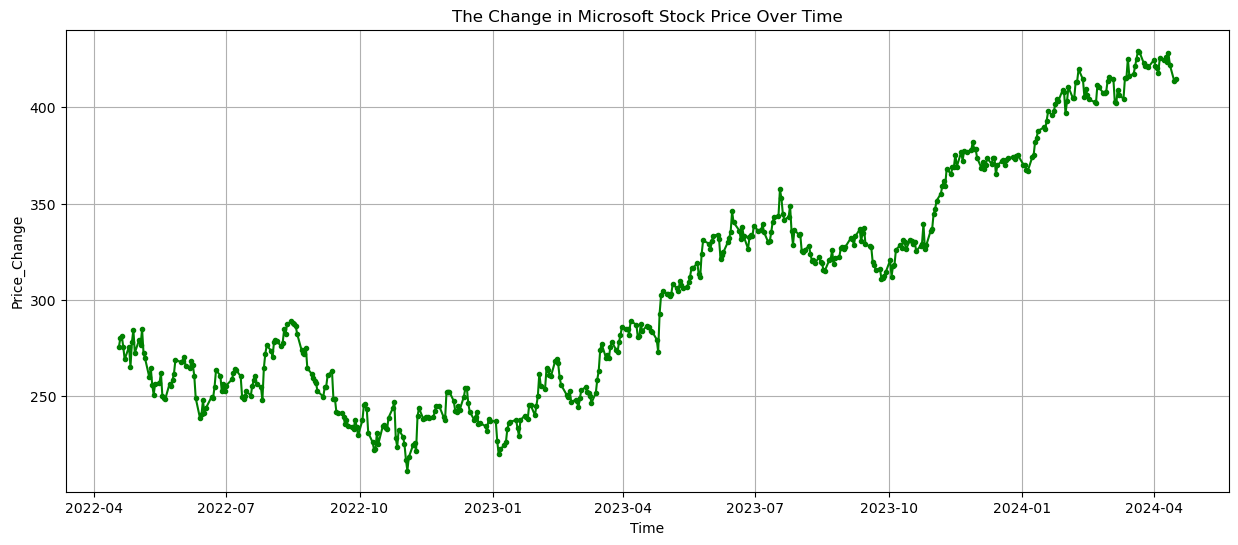

In [62]:
# Visualize Change in Microsoft Stock Prices Over Time

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.plot(microsoft_1.index, microsoft_1['Adj Close'], color = 'green', marker = '.')
plt.title('The Change in Microsoft Stock Price Over Time')
plt.xlabel('Time')
plt.ylabel('Price_Change')
plt.grid()
plt.show()

### # Task 4 : *Visualize the change in a stock’s volume being traded, over time?*

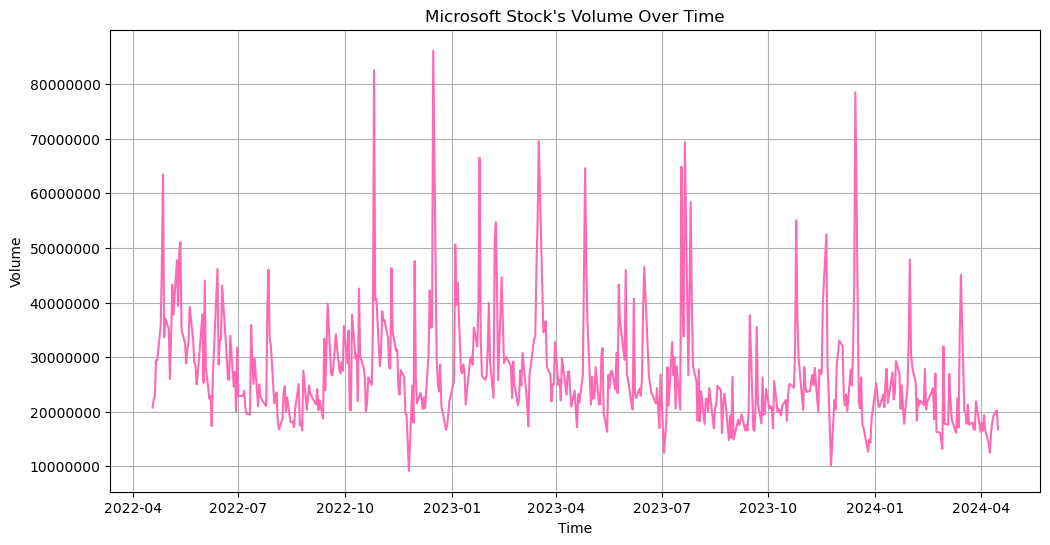

In [63]:
# Visualize Change in Stock's Volume Over Time.

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(12, 6))
sns.lineplot(x = microsoft_1.index, y = microsoft_1['Volume'], color = 'hotpink')
plt.title("Microsoft Stock's Volume Over Time")
plt.xlabel('Time')
plt.ylabel('Volume')
plt.ticklabel_format(style='plain', axis='y')
plt.grid()
plt.show()

### # Task 5 : *What was the moving average of Microsoft stock?*

In [64]:
# Calculating Simple Moving Average (SMA) of 50 days and 200 days.

microsoft_1['SMA_50'] = microsoft_1['Adj Close'].rolling(window=50).mean()
microsoft_1['SMA_200'] = microsoft_1['Adj Close'].rolling(window=200).mean()

microsoft_1[['SMA_50','SMA_200']]

,SMA_50,SMA_200
Date,,
2022-04-18,NaN,NaN
2022-04-19,NaN,NaN
2022-04-20,NaN,NaN
2022-04-21,NaN,NaN
2022-04-22,NaN,NaN
...,...,...
2024-04-10,413.950379,363.982820
2024-04-11,414.352263,364.489282
2024-04-12,414.853340,364.935923


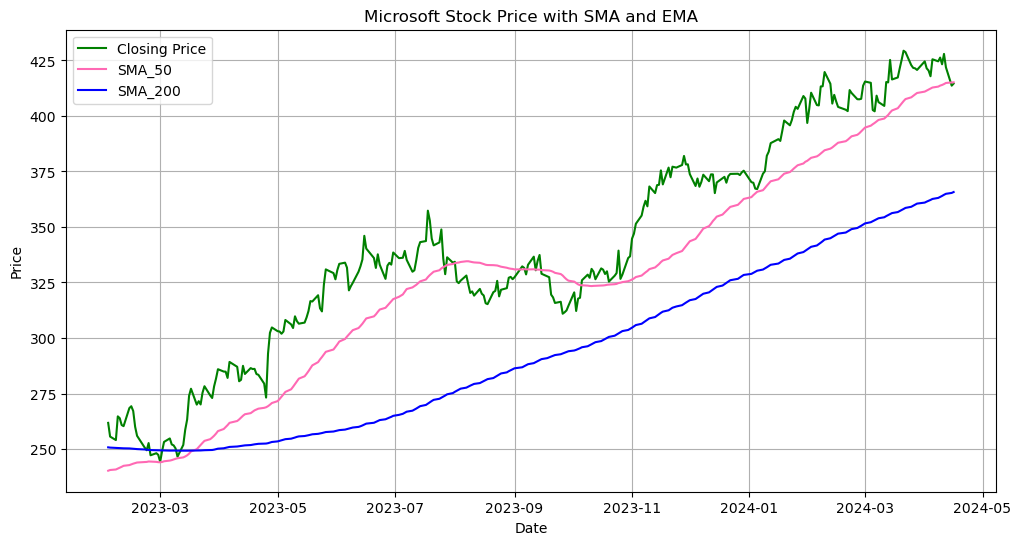

In [65]:
# Plotting the SMA_50, and SMA_200 of Microsoft Stock.

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.lineplot(microsoft_1['Adj Close'].iloc[200:], label='Closing Price', color = 'green')
sns.lineplot(microsoft_1['SMA_50'].iloc[200:], label='SMA_50', color='hotpink')
sns.lineplot(microsoft_1['SMA_200'].iloc[200:], label='SMA_200', color='blue')

plt.title('Microsoft Stock Price with SMA and EMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

### # Task 6 : *What was the daily return average of a stock?*

In [66]:
# Calculating the Daily Return

microsoft_1['Daily Return (in %)'] = microsoft_1['Adj Close'].pct_change()*100
microsoft_1[['Daily Return (in %)']]

,Daily Return (in %)
Date,
2022-04-18,NaN
2022-04-19,1.703971
2022-04-20,0.371554
2022-04-21,-1.938125
2022-04-22,-2.414436
...,...
2024-04-10,-0.708452
2024-04-11,1.103337
2024-04-12,-1.409109


In [67]:
# Daily return average :

print(
      'The daily return average of a Microsoft stock is : ', 
       round(microsoft_1['Daily Return (in %)'].mean(),2),
       '%'
     )

The daily return average of a Microsoft stock is :  0.1 %


### # Task 7 : *Add a new column ‘Trend’ whose values are based on the 'Daily Return'.*

In [68]:
# Microsoft Stock's Trend :

microsoft_1['Trend'] = 'Stable'     

microsoft_1.loc[microsoft_1['Daily Return (in %)'] > 0, 'Trend'] = 'Positive'

microsoft_1.loc[microsoft_1['Daily Return (in %)'] < 0, 'Trend'] = 'Negative'

print('\nMicrosoft Stock Trend :')
microsoft_1[['Daily Return (in %)', 'Trend']].head()


Microsoft Stock Trend :


,Daily Return (in %),Trend
Date,,
2022-04-18,NaN,Stable
2022-04-19,1.703971,Positive
2022-04-20,0.371554,Positive
2022-04-21,-1.938125,Negative
2022-04-22,-2.414436,Negative


### # Task 8 : *Visualize trend frequency through a Pie Chart.*

In [69]:
# Count the frequency of Microsoft stock's Trend frequency.

microsoft_counts = microsoft_1['Trend'].value_counts()
print('\nMicrosoft counts : \n', microsoft_counts)


Microsoft counts : 
 Positive    254
Negative    247
Stable        1
Name: Trend, dtype: int64


Text(0.5, 1.0, 'MICROSOFT')

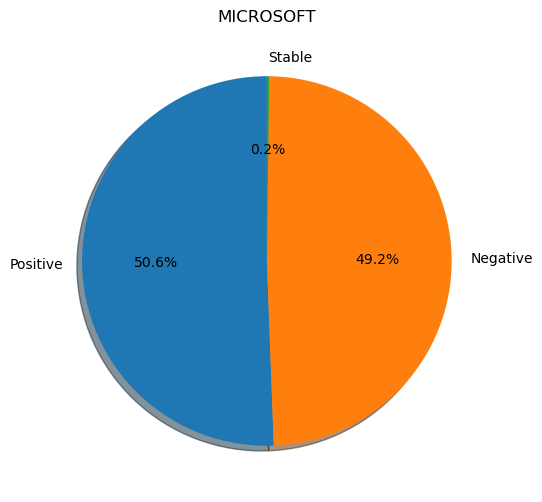

In [70]:
# Visualize through a Pie Chart.

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.pie(microsoft_counts, labels = microsoft_counts.index, autopct='%1.1f%%', shadow = True, startangle = 90)
plt.title('MICROSOFT')

# Combined Analysis :

### # Task 9 : *What was the correlation between the daily returns of different stocks?*

In [71]:
# Making DataFrame of diffrent stocks daily return

import pandas as pd

# Concatinating all column in one DtaFrame.
df = pd.concat(
               [amazon_data_1['Daily Return (in %)'], apple_1['Daily Return (in %)'],
                google_1['Daily Return (in %)'], microsoft_1['Daily Return (in %)']],
                axis = 1
               )
df.columns = ['AMAZON', 'APPLE', 'GOOGLE', 'MICROSOFT']
df

,AMAZON,APPLE,GOOGLE,MICROSOFT
Date,,,,
2022-04-18,NaN,NaN,NaN,NaN
2022-04-19,3.488883,1.411517,1.826886,1.703971
2022-04-20,-2.604104,-0.101551,-1.514518,0.371554
2022-04-21,-3.702643,-0.484359,-2.519130,-1.938125
2022-04-22,-2.660894,-2.782114,-4.149358,-2.414436
...,...,...,...,...
2024-04-10,0.150805,-1.113927,-0.293746,-0.708452
2024-04-11,1.667118,4.327092,2.094277,1.103337
2024-04-12,-1.544564,0.862666,-1.053891,-1.409109


In [72]:
# Calculating the correlation matrix

correlation_matrix = df.corr()
correlation_matrix

,AMAZON,APPLE,GOOGLE,MICROSOFT
AMAZON,1.000000,0.609718,0.681740,0.696309
APPLE,0.609718,1.000000,0.674882,0.705617
GOOGLE,0.681740,0.674882,1.000000,0.697002
MICROSOFT,0.696309,0.705617,0.697002,1.000000


<Axes: >

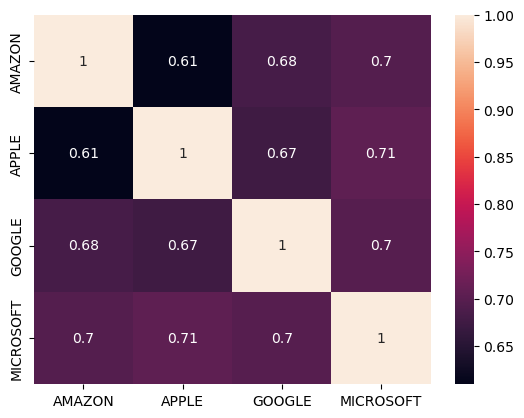

In [73]:
# To visualizing the correlation between diffrent stocks daily return.

import seaborn as sns

sns.heatmap(df.corr(), annot = True)